Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Important Note:** This notebook was AI-generated and has not been fully verified. Users should be cautious when interpreting the code or results.

This notebook provides an overview of the Dandiset 000690, which contains data from the Allen Institute Openscope - Vision2Hippocampus project. The project aims to understand how neural representations of visual stimuli evolve from the LGN through V1 to the hippocampus.

Link to the Dandiset: https://dandiarchive.org/dandiset/000690

This notebook will cover the following:
1.  Loading the Dandiset metadata using the DANDI API.
2.  Listing the assets (files) available in the Dandiset.
3.  Loading an NWB file and exploring its contents.
4.  Visualizing data from the NWB file.
5.  Concluding with possible future directions for analysis.

### Required Packages
The following packages are required to run this notebook. Please ensure that they are installed on your system.
- pynwb
- h5py
- remfile
- matplotlib
- numpy
- pandas
- seaborn

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Loading the Dandiset

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


### Loading and Exploring an NWB File

We will load the first NWB file in the Dandiset: `sub-692072/sub-692072_ses-1298465622.nwb`.
The asset ID is `fbcd4fe5-7107-41b2-b154-b67f783f23dc`, and the URL is `https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/`.

Here's how to load this NWB file and explore some of its metadata.

You can also explore this file on neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Print some basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: Data and metadata for an Ecephys session
Identifier: 1298465622
Session start time: 2023-09-21 00:00:00-07:00


### Exploring Eye Tracking Data
This NWB file contains eye tracking data. Let's explore the `EyeTracking` acquisition.

In [4]:
# Access eye tracking data
acquisition = nwb.acquisition
EyeTracking = acquisition["EyeTracking"]
spatial_series = EyeTracking.spatial_series
eye_tracking = spatial_series["eye_tracking"]

# Print some information about the eye tracking data
print(f"Eye tracking data shape: {eye_tracking.data.shape}")
print(f"Eye tracking timestamps shape: {eye_tracking.timestamps.shape}")
print(f"Eye tracking unit: {eye_tracking.unit}")
eye_tracking_data = eye_tracking.data[:]
eye_tracking_timestamps = eye_tracking.timestamps[:]
eye_tracking_df = pd.DataFrame(eye_tracking_data, columns=['x', 'y'])
eye_tracking_df['timestamps'] = eye_tracking_timestamps

Eye tracking data shape: (485980, 2)
Eye tracking timestamps shape: (485980,)
Eye tracking unit: meters


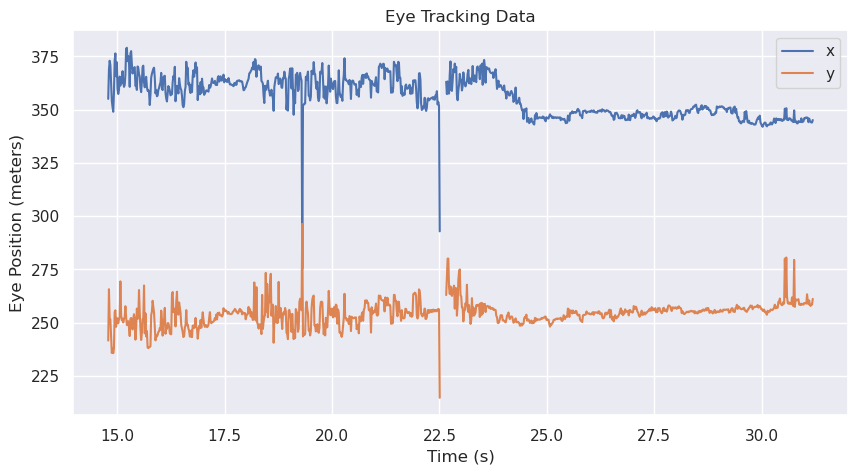

In [5]:
# Plot the eye tracking data
sns.set_theme()
plt.figure(figsize=(10, 5))
plt.plot(eye_tracking_df['timestamps'][:1000], eye_tracking_df['x'][:1000], label='x')
plt.plot(eye_tracking_df['timestamps'][:1000], eye_tracking_df['y'][:1000], label='y')
plt.xlabel('Time (s)')
plt.ylabel('Eye Position (meters)')
plt.title('Eye Tracking Data')
plt.legend()
plt.show()

 The above plot shows the x and y coordinates of the eye position over time.

### Exploring Running Speed Data
The running speed is stored in the `processing` module. Let's explore it.

In [6]:
# Access running speed data
processing = nwb.processing
running = processing["running"]
data_interfaces = running.data_interfaces
running_speed = data_interfaces["running_speed"]

# Print some information about the running speed data
print(f"Running speed data shape: {running_speed.data.shape}")
print(f"Running speed timestamps shape: {running_speed.timestamps.shape}")
print(f"Running speed unit: {running_speed.unit}")

running_speed_data = running_speed.data[:]
running_speed_timestamps = running_speed.timestamps[:]

running_speed_df = pd.DataFrame({'speed': running_speed_data, 'timestamps': running_speed_timestamps})

Running speed data shape: (118163,)
Running speed timestamps shape: (118163,)
Running speed unit: cm/s


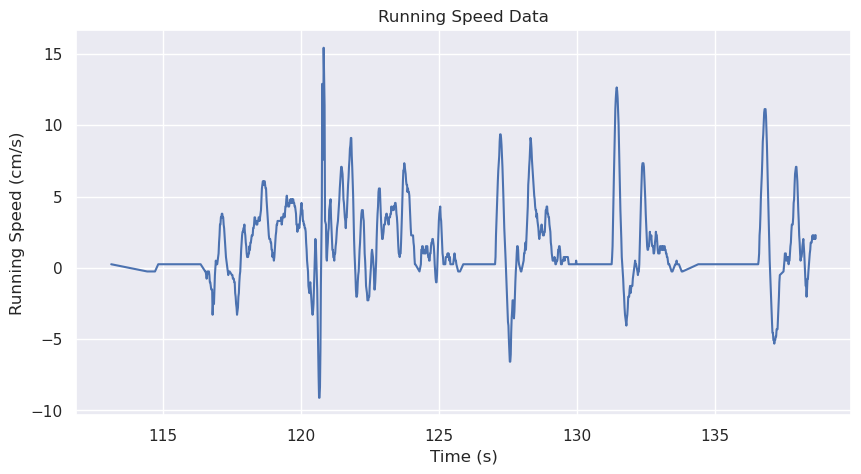

In [7]:
# Plot the running speed data
plt.figure(figsize=(10, 5))
plt.plot(running_speed_df['timestamps'][:1000], running_speed_df['speed'][:1000])
plt.xlabel('Time (s)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Running Speed Data')
plt.show()

The above plot shows the running speed of the mouse over time.

### Exploring Stimulus Presentation Times
The stimulus presentation times are stored in the `intervals` module. Let's explore the `SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations` interval.

In [8]:
# Access stimulus presentation times
intervals = nwb.intervals
stimulus_presentations = intervals["SAC_Wd15_Vel8_Bndry1_Cntst0_loop_presentations"]

# Print some information about the stimulus presentation times
print(f"Stimulus presentation times description: {stimulus_presentations.description}")
print(f"Stimulus presentation times columns: {stimulus_presentations.colnames}")

stimulus_presentations_df = stimulus_presentations.to_dataframe()

# Display the first few rows of the DataFrame
print(stimulus_presentations_df.head())

Stimulus presentation times description: Presentation times and stimuli details for 'SAC_Wd15_Vel8_Bndry1_Cntst0_loop' stimuli. 
Note: image_name references control_description in stimulus/templates
Stimulus presentation times columns: ('start_time', 'stop_time', 'stimulus_name', 'stimulus_block', 'frame', 'color', 'contrast', 'opacity', 'orientation', 'size', 'units', 'stimulus_index', 'tags', 'timeseries')


     start_time    stop_time                     stimulus_name  \
id                                                               
0   1250.087920  1250.104601  SAC_Wd15_Vel8_Bndry1_Cntst0_loop   
1   1250.104601  1250.121283  SAC_Wd15_Vel8_Bndry1_Cntst0_loop   
2   1250.121283  1250.137964  SAC_Wd15_Vel8_Bndry1_Cntst0_loop   
3   1250.137964  1250.154645  SAC_Wd15_Vel8_Bndry1_Cntst0_loop   
4   1250.154645  1250.171326  SAC_Wd15_Vel8_Bndry1_Cntst0_loop   

    stimulus_block  frame            color  contrast  opacity  orientation  \
id                                                                           
0              3.0    0.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
1              3.0    1.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
2              3.0    2.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
3              3.0    3.0  [1.0, 1.0, 1.0]       1.0      1.0          0.0   
4              3.0    4.0  [1.0, 1.0, 1.0]       1.0      1.0        

### Combining Eye Tracking and Running Speed Data:

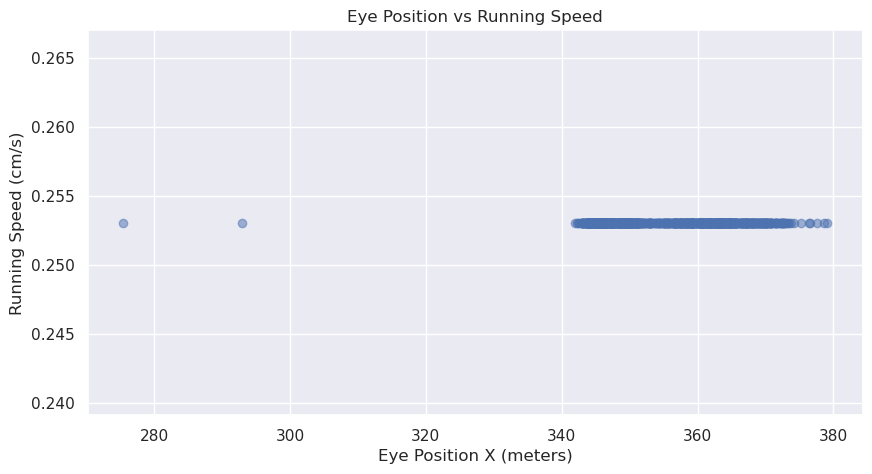

In [9]:
# Synchronize eye tracking and running speed
time_index = np.searchsorted(running_speed_df['timestamps'], eye_tracking_df['timestamps'])
time_index = np.clip(time_index, 0, len(running_speed_df) - 1)
eye_tracking_df['running_speed'] = running_speed_df['speed'].iloc[time_index].values

# Plot eye position vs running speed
plt.figure(figsize=(10, 5))
plt.scatter(eye_tracking_df['x'][:1000], eye_tracking_df['running_speed'][:1000], alpha=0.5)
plt.xlabel('Eye Position X (meters)')
plt.ylabel('Running Speed (cm/s)')
plt.title('Eye Position vs Running Speed')
plt.show()

### Conclusions and Future Directions
In this notebook, we have demonstrated how to load and explore data from Dandiset 000690 using the DANDI API and PyNWB. We loaded the Dandiset metadata, accessed the eye tracking and running speed data, visualized the data, and combined eye tracking and running speed data to examine their interrelationship.

Possible future directions for analysis include:
1.  Exploring the neural activity data in the `ecephys` modules.
2.  Analyzing the relationship between eye tracking and stimulus presentation.
3.  Investigating the neural correlates of running speed and behavior.
4.  Performing more advanced signal processing and machine learning analyses on the neural data.